<a href="https://colab.research.google.com/github/ayhanardal/OLS/blob/main/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

## Titles
  
  - [Import Libraries & Data](#a)
    - [Overview for data](#a1)
  - [EDA](#b)
  - [Modelling](#c)
  - [Recap](#d)

## Import Libraries & Data
<a id="a"></a>

In [95]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Import data
sheet_id = '14JT2P3DQJ5oFA8VBhpGUtauQDYrdTnuppt4yKs-nHwI'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
advertising = pd.read_csv(url)
df = advertising.copy()
df = df.iloc[:,1:len(df)]
y = df[['sales']]
X = df.drop('sales',axis=1)

### Overview for data
<a id="a1"></a>

In [74]:
# Preview of the dataset
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
# Check for missing data
all_cols = df.columns
for col in all_cols:
    print(col, '-', df[col].isnull().values.any())

TV - False
radio - False
newspaper - False
sales - False


In [76]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## EDA

<a id="b"></a>

[Text(0.5, 1.0, 'Sums of variables')]

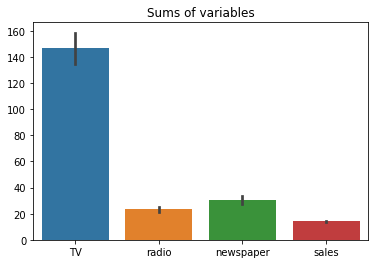

In [77]:
sns.barplot(data = df).set(title='Sums of variables')

[Text(0.5, 1.0, 'Outlier values of variables')]

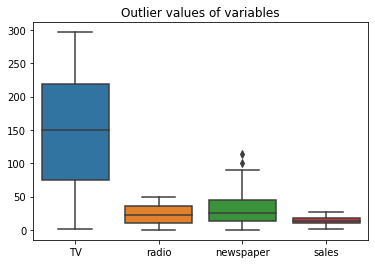

In [78]:
sns.boxplot(data= df).set(title='Outlier values of variables')

[Text(0.5, 1.0, 'Correlation heatmap')]

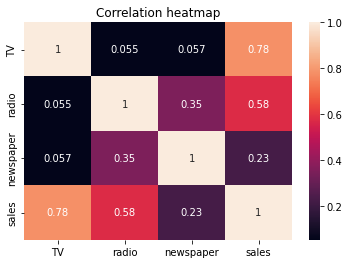

In [79]:
sns.heatmap(df.corr(), annot = True).set(title='Correlation heatmap')

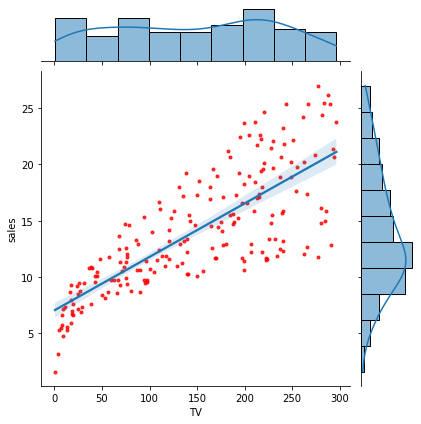

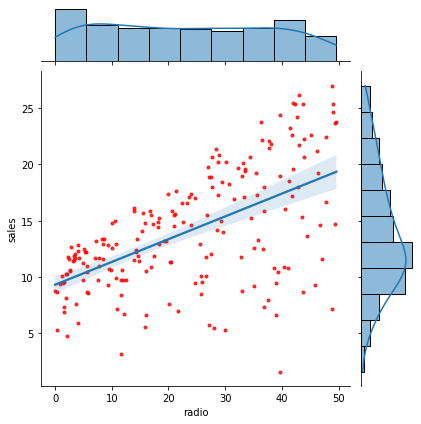

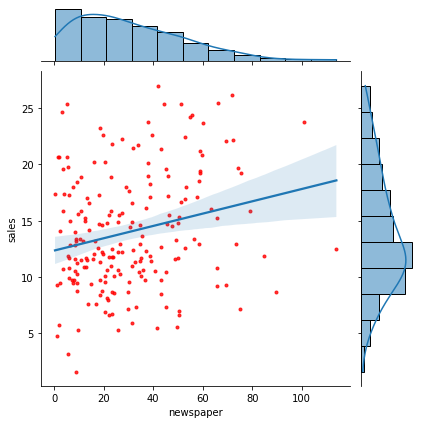

In [80]:
for i in range(3):
  sns.jointplot(x=df.columns[i],y='sales',data=df,kind='reg', scatter_kws = {'color': 'r','s':9})

Text(0.5, 1.03, 'Regression analysis of all variables')

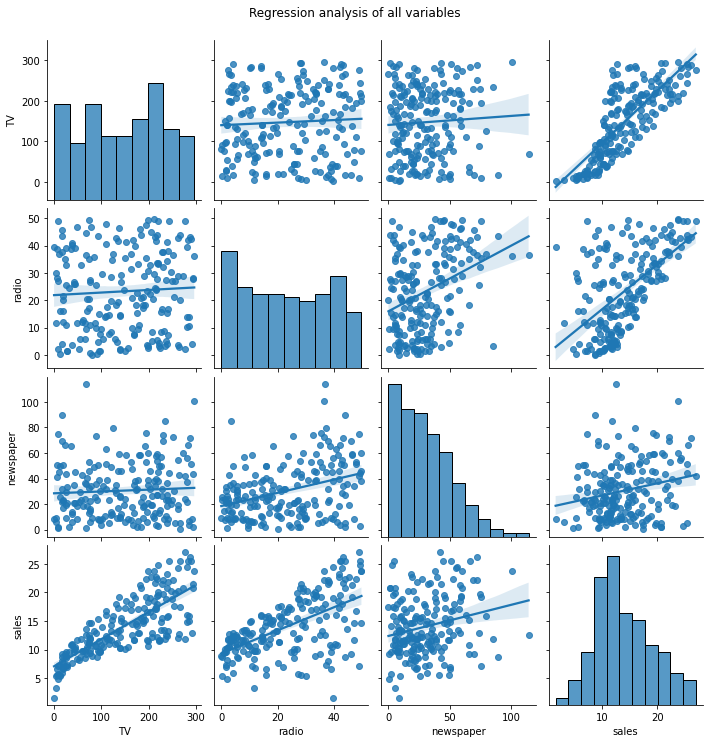

In [81]:
sns.pairplot(df,kind='reg').fig.suptitle('Regression analysis of all variables', y = 1.03)

## Modelling
<a id="c"></a>

In [82]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [83]:
# Models fitting
X1 = sm.add_constant(X['TV'])
X2 = sm.add_constant(X['radio'])
X3 = sm.add_constant(X['newspaper'])
lm1 = sm.OLS(y,X1)
model1 = lm1.fit()
lm2 = sm.OLS(y,X2)
model2 = lm2.fit()
lm3 = sm.OLS(y,X3)
model3 = lm3.fit()

XS = [X1,X2,X3]
models = [model1,model2,model3]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Recap
<a id="d"></a>

In [84]:
# Models summary
for i in range(3):
  print(models[i].summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        15:12:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [85]:
# Parameters of models
for i in range(3):
  print('Sales :' , str('%.4f' % models[i].params[0]) , f'+ {df.columns[i]} *' , str( '%.4f' % models[i].params[1]))

Sales : 7.0326 + TV * 0.0475
Sales : 9.3116 + radio * 0.2025
Sales : 12.3514 + newspaper * 0.0547


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

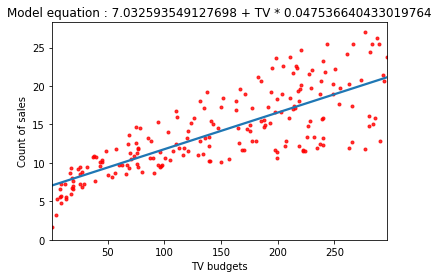

In [86]:
# Lineer regression graph and model equation of TV variable
g = sns.regplot(df[df.columns[0]],df['sales'],ci=None, scatter_kws={'color':'r','s':9})
g.set_title(f'Model equation : {models[0].params[0]} + {df.columns[0]} * {models[0].params[1]}')
g.set_ylabel('Count of sales')
g.set_xlabel(f'{df.columns[0]} budgets')
plt.xlim(df[df.columns[0]].values.min(),df[df.columns[0]].values.max())
plt.ylim(bottom= 0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

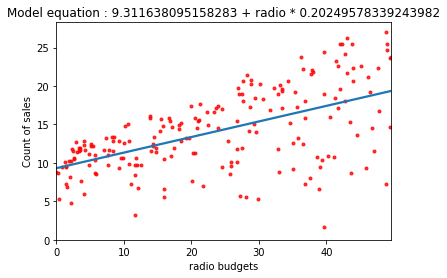

In [87]:
# Lineer regression graph and model equation of radio variable
g = sns.regplot(df[df.columns[1]],df['sales'],ci=None, scatter_kws={'color':'r','s':9})
g.set_title(f'Model equation : {models[1].params[0]} + {df.columns[1]} * {models[1].params[1]}')
g.set_ylabel('Count of sales')
g.set_xlabel(f'{df.columns[1]} budgets')
plt.xlim(df[df.columns[1]].values.min(),df[df.columns[1]].values.max())
plt.ylim(bottom= 0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

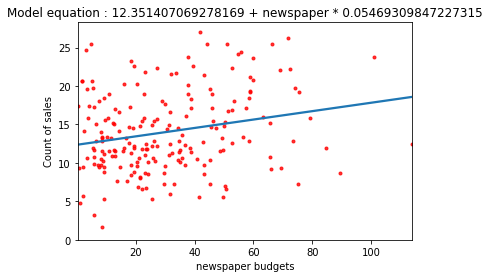

In [88]:
# Lineer regression graph and model equation of newspaper variable
g = sns.regplot(df[df.columns[2]],df['sales'],ci=None, scatter_kws={'color':'r','s':9})
g.set_title(f'Model equation : {models[2].params[0]} + {df.columns[2]} * {models[2].params[1]}')
g.set_ylabel('Count of sales')
g.set_xlabel(f'{df.columns[2]} budgets')
plt.xlim(df[df.columns[2]].values.min(),df[df.columns[2]].values.max())
plt.ylim(bottom= 0)

In [89]:
# MSE of models
for i in range(3):
  print(f'mse : {mean_squared_error(y, models[i].fittedvalues)} ({df.columns[i]})')
for i in range(3):
  print(f'rmse : {np.sqrt(mean_squared_error(y, models[i].fittedvalues))} ({df.columns[i]})')

mse : 10.512652915656753 (TV)
mse : 18.092397745125435 (radio)
mse : 25.674022720559698 (newspaper)
rmse : 3.2423221486546883 (TV)
rmse : 4.2535159274564185 (radio)
rmse : 5.066953988399707 (newspaper)


In [90]:
# Estimates of models
for i in range(3):
  print(f'Estimate ({df.columns[i]}) :'+'\n'+f'{models[i].predict(XS[i])[:5]}')

Estimate (TV) :
0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64
Estimate (radio) :
0    16.965979
1    17.269722
2    18.606195
3    17.674714
4    11.498593
dtype: float64
Estimate (newspaper) :
0    16.136169
1    14.818066
2    16.141639
3    15.550953
4    15.545484
dtype: float64


In [91]:
# Actual values of models
print('Actual values :'+'\n'+f'{y[:5]}')

Actual values :
   sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


In [ ]:
# Actual values and estimate values in a dataframe
ac_es1 = pd.DataFrame({ 'Actual values': y.sales, 'Estimate' : models[0].predict(XS[0])})
ac_es2 = pd.DataFrame({ 'Actual values': y.sales, 'Estimate' : models[1].predict(XS[1])})
ac_es3 = pd.DataFrame({ 'Actual values': y.sales, 'Estimate' : models[2].predict(XS[2])})

In [ ]:
# Adding error column
ac_es1['Error'] = ac_es1['Actual values'] - ac_es1['Estimate']
ac_es2['Error'] = ac_es2['Actual values'] - ac_es2['Estimate']
ac_es3['Error'] = ac_es3['Actual values'] - ac_es3['Estimate']

# Adding squares of errors column
ac_es1['Square of errors'] = ac_es1['Error'] ** 2
ac_es2['Square of errors'] = ac_es2['Error'] ** 2
ac_es3['Square of errors'] = ac_es3['Error'] ** 2

In [ ]:
# Errors in a dataframe
error_df = pd.DataFrame({'Error1': ac_es1['Error'],'Error2': ac_es2['Error'],'Error3': ac_es3['Error'],'Square of errors1':ac_es1['Square of errors'],'Square of errors2':ac_es2['Square of errors'],'Square of errors3':ac_es3['Square of errors']})
error_df.head()

,Error1,Error2,Error3,Square of errors1,Square of errors2,Square of errors3
0,4.129225,5.134021,5.963831,17.050503,26.358175,35.567274
1,1.252026,-6.869722,-4.418066,1.567569,47.193086,19.519306
2,1.449776,-9.306195,-6.841639,2.101851,86.605257,46.808021
3,4.265605,0.825286,2.949047,18.195390,0.681097,8.696876
4,-2.727218,1.401407,-2.645484,7.437719,1.963943,6.998586
